In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# Load the data
photophobiadata=pd.read_csv('/Users/frankhu/Moxytech/PhotophobiaData/data_test_V2_labeled.csv')
print(photophobiadata.shape)
# print(photophobiadata['Visits'])

(46, 436)


In [3]:
# Sort data to pre & post

pretdcs = pd.DataFrame()
posttdcs = pd.DataFrame()

for i in range(0,photophobiadata.shape[0]):
    if '30 day' in str(photophobiadata['Visits'][i]):
       pretdcs=pd.concat([pretdcs,photophobiadata.loc[i:i]],axis =0)
       #print(i)
    if 'pre' in str(photophobiadata['Visits'][i]):
       pretdcs=pd.concat([pretdcs,photophobiadata.loc[i:i]],axis =0)
       #print(i)

    else:
       posttdcs=pd.concat([posttdcs,photophobiadata.loc[i:i]],axis =0)


#print(pretdcs.shape)
#print(posttdcs.shape)

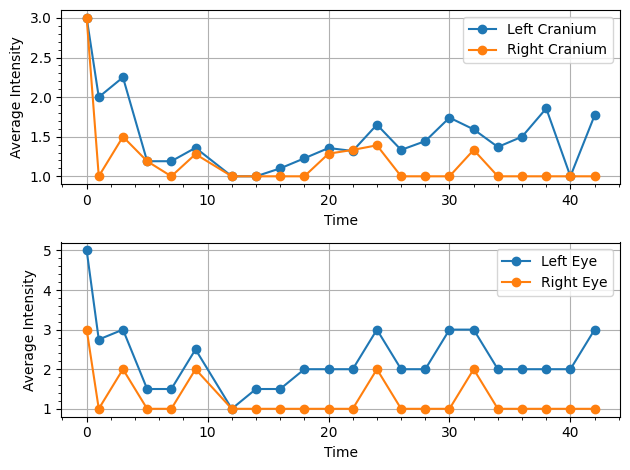

In [4]:

# Plot the data for pre and post
plt.subplot(2,1,1)
ax1=plt.gca()
pretdcs.plot(y=['Average_intensity','Average_intensity.1'],ax=ax1,kind='line',grid=True,marker = 'o',use_index=True)
ax1.legend(["Left Cranium","Right Cranium"])
#plt.xticks(rotation=15)
plt.xlabel('Time')
plt.ylabel('Average Intensity')
plt.tight_layout()
plt.minorticks_on()

plt.subplot(2,1,2)
ax2=plt.gca()
pretdcs.plot(y=['Average_intensity.2','Average_intensity.3'],ax=ax2,kind='line',grid=True,marker = 'o',use_index=True)
ax2.legend(["Left Eye","Right Eye"])
#plt.xticks(rotation=15)
plt.xlabel('Time')
plt.ylabel('Average Intensity')
plt.tight_layout()
plt.minorticks_on()
plt.show()

In [37]:
# Fit a ploy to the data 
def t_plot(x,y):
    
    trend = np.polyfit(x,y,deg=1)
    plt.plot(x,y,'o')
    trendpoly=np.poly1d(trend)
    plt.plot(x,trendpoly(x))
    plt.xlabel('Time')
    plt.ylabel('Average Intensity')

    return trend


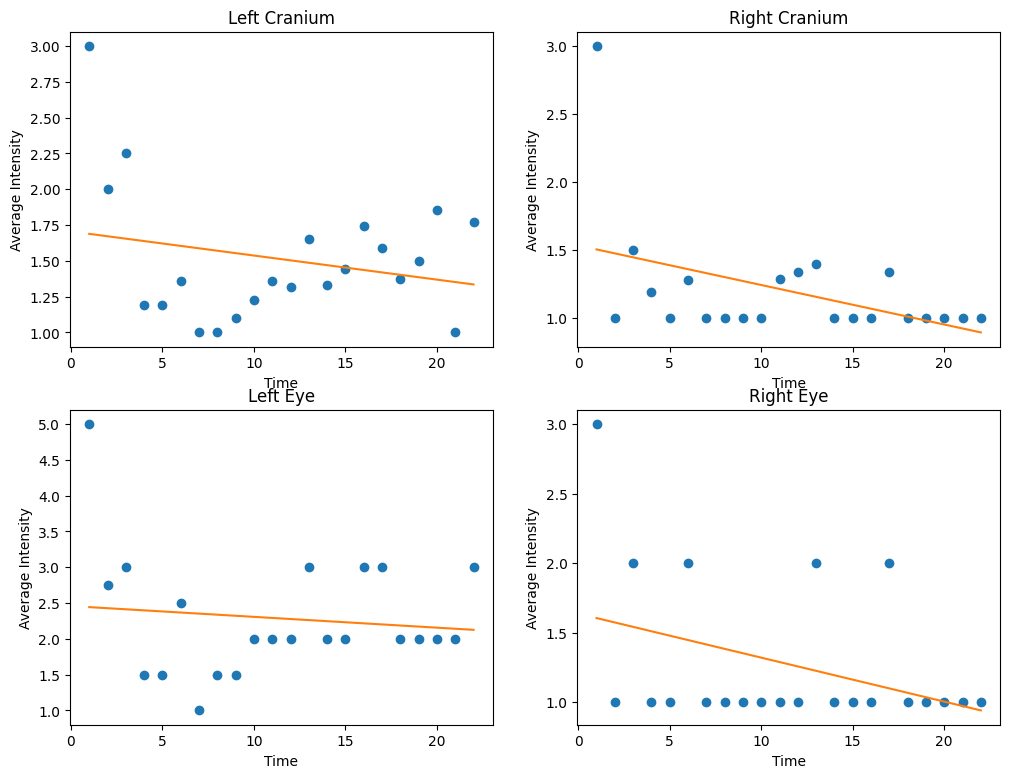

In [51]:
fig=plt.subplots(2, 2, figsize=(12,9))

ax1=plt.subplot(2,2,1)
x = range(1,len(pretdcs)+1)
y = pretdcs['Average_intensity'].to_numpy()
trend1=t_plot(x,y)
ax1.title.set_text('Left Cranium')

ax2=plt.subplot(2,2,2)
x = range(1,len(pretdcs)+1)
y = pretdcs['Average_intensity.1'].to_numpy()
trend2 = t_plot(x,y)
ax2.title.set_text('Right Cranium')


ax3=plt.subplot(2,2,3)
x = range(1,len(pretdcs)+1)
y = pretdcs['Average_intensity.2'].to_numpy()
trend3 = t_plot(x,y)
ax3.title.set_text('Left Eye')

ax4=plt.subplot(2,2,4)
x = range(1,len(pretdcs)+1)
y = pretdcs['Average_intensity.3'].to_numpy()
trend4 = t_plot(x,y)
ax4.title.set_text('Right Eye')

plt.show()

In [48]:
fitting_score = pd.concat([pd.Series(trend1),pd.Series(trend2),pd.Series(trend3),pd.Series(trend4)],axis=1)
fitting_score.index = ['Slope','Intecept']
fitting_score.columns = ['Left Cranium','Right Cranium','Left Eye','Right Eye']
fitting_score

,Left Cranium,Right Cranium,Left Eye,Right Eye
Slope,-0.016828,-0.029107,-0.015104,-0.031621
Intecept,1.705133,1.530832,2.457792,1.636364
